In [1]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, UpSampling2D, Reshape, Flatten, MaxPooling2D
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


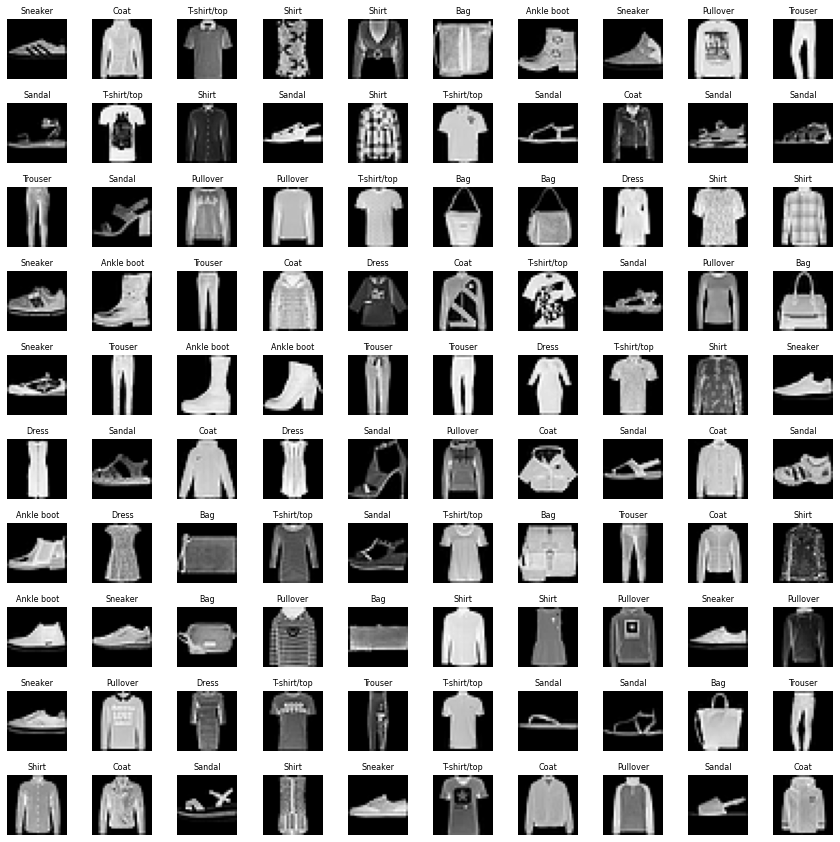

In [4]:
# Plot de várias imagens
largura = 10
altura = 10
figura, axes = plt.subplots(altura, largura, figsize=(15,15))

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

axes = axes.ravel()

for i in np.arange(0, 100):
  indice = np.random.randint(0, X_treinamento.shape[0])
  axes[i].imshow(X_treinamento[indice], cmap='gray')
  axes[i].set_title(classes[y_treinamento[indice]], fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [5]:
X_treinamento = X_treinamento.reshape((len(X_treinamento), 28, 28, 1))
X_teste = X_teste.reshape((len(X_teste), 28, 28, 1))

In [6]:
autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', padding = 'valid', input_shape = (28,28,1)))
autoencoder.add(MaxPooling2D(pool_size = (2,2)))

autoencoder.add(Conv2D(filters = 8, kernel_size = (3,3), activation = 'relu', padding = 'same'))
autoencoder.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

autoencoder.add(Conv2D(filters = 8, kernel_size = (3,3), activation = 'relu', padding = 'same'
              , strides = (2,2) # Deslocamento do kernel na imagem, valor padrão = 1 
                       ))

autoencoder.add(Flatten())

# Decoder
autoencoder.add(Reshape((4,4,8)))
autoencoder.add(Conv2D(filters = 8, kernel_size = (3,3), activation = 'relu', padding = 'same'))
autoencoder.add(UpSampling2D(size=(2,2))) # Está relacionado com o Max pooling

autoencoder.add(Conv2D(filters = 8, kernel_size = (3,3), activation = 'relu', padding = 'same'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', padding = 'valid'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters = 1, # 1 canal de cor
                       kernel_size = (3,3), activation = 'relu', padding = 'same'))

autoencoder.summary()

# Ao final as dimensões de entrada e de saída devem ser os mesmos

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 flatten (Flatten)           (None, 128)               0

In [7]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])
autoencoder.fit(X_treinamento, X_treinamento, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 18s 4ms/step - loss: -1096.4729 - accuracy: 0.1383
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: -1098.2203 - accuracy: 0.1079
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: -1098.1093 - accuracy: 0.1182
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: -1098.3276 - accuracy: 0.1347
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: -1098.6904 - accuracy: 0.1609
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: -1098.5941 - accuracy: 0.1829
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: -1098.5442 - accuracy: 0.1401
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: -1097.2782 - accuracy: 0.1429
Epoch 9/50
1875/1875 [==============================] - 8s 4ms/step - loss: -1098.4541 - accuracy: 0.1174
Epoch 10/50
1875/1875 [======================

In [8]:
# Padding = valid -> perde-se um pouco da imagem
# Padding = same -> Não perde-se informação da imagem
# Cálculo do output: (input - filter + 1) / stride -> apenas para padding = valid

# Input: (28, 28, 1)
# Filter size = 3
# Output = (28 - 3 + 1) / 1 -> 26, 26, 16

# Upsampling2D: (16,16,8)
# Filter size: 3
# Output = (16 - 3 + 1) / 1 -> 14, 14, 16

# A última camada deve possuir a mesma dimensão da camada de entrada

In [10]:
autoencoder.summary()
# No flatten encontra-se a imagem codificada

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 flatten (Flatten)           (None, 128)               0

In [11]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('flatten').output) 
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584   

In [12]:
imagens_teste_cod = encoder.predict(X_teste)

In [13]:
imagens_teste_cod.shape

(10000, 128)

In [14]:
imagens_teste_decod = autoencoder.predict(X_teste)

In [16]:
imagens_teste_decod.shape

(10000, 28, 28, 1)

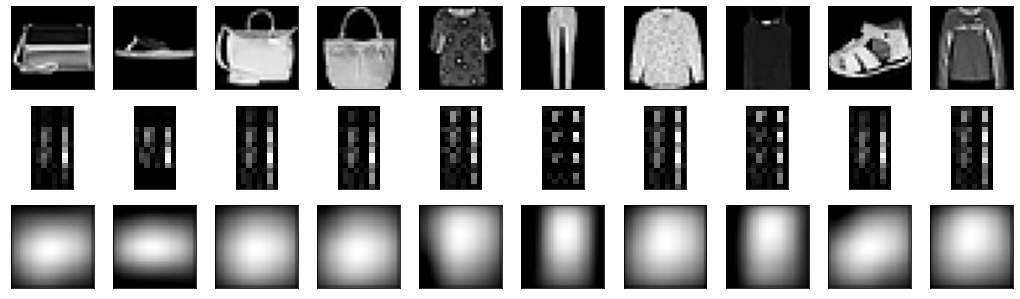

In [22]:
numero_imagens = 10
imagens_teste = np.random.randint(0, 10000, size = numero_imagens)
plt.figure(figsize = (18, 18))

for i, imagem_indice in enumerate(imagens_teste):
  ax = plt.subplot(10,10,i+1)
  plt.imshow(X_teste[imagem_indice].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  ax = plt.subplot(10,10,i+1+numero_imagens)
  plt.imshow(imagens_teste_cod[imagem_indice].reshape(16,8), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  ax = plt.subplot(10,10,i+1+numero_imagens*2)
  plt.imshow(imagens_teste_decod[imagem_indice].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())